<a href="https://colab.research.google.com/github/willewiik/Time-Series-and-Sequence-Learning/blob/main/old_exams/exam_22_02_16_TS/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/willewiik/Time-Series-and-Sequence-Learning.git
%cd "Time-Series-and-Sequence-Learning/old_exams/exam_22_02_16_TS"

Cloning into 'Time-Series-and-Sequence-Learning'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 64 (delta 22), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (64/64), 1016.67 KiB | 4.64 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/Time-Series-and-Sequence-Learning/old_exams/exam_22_02_16_TS


# Problem 1:

(10 points)

**a)** The file `data_problem1.csv` contains a sequence of observations. In this problem you should do the following:

1. Load the data and split it into 80 % training and 20 % validation data.
2. Pre-process the data as you find appropriate.
3. Produce mean-squared-error curves for model orders in the range $p=1,\dots,10$. Plot both training and validation errors as two separate curves.
4. Based on the error curves, pick a final model order $p$ that you think is appropriate. **Motivate your choice!**


<div style="text-align: right"> (6p) </div>


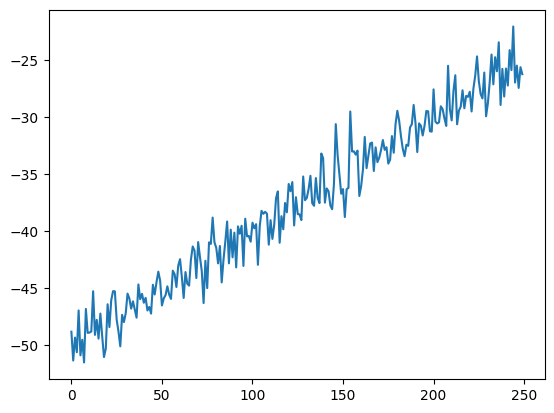

In [3]:
data = pd.read_csv('data_problem1.csv', header = 0)
y = data['Data'].values
plt.plot(y)
plt.show()

**Solution:**

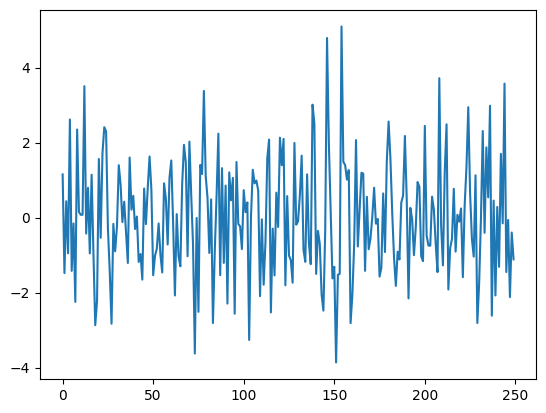

In [9]:
from sklearn import linear_model as lm
n = int(len(y) * 0.8)
#train = y[:n]
#val = y[n:]

time = np.array(range(len(y))).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
lmfit = lm.LinearRegression().fit(time, y)
detrend = y - lmfit.predict(time)

plt.plot(detrend)
plt.show()

train = detrend[:n]
val = detrend[n:]

___

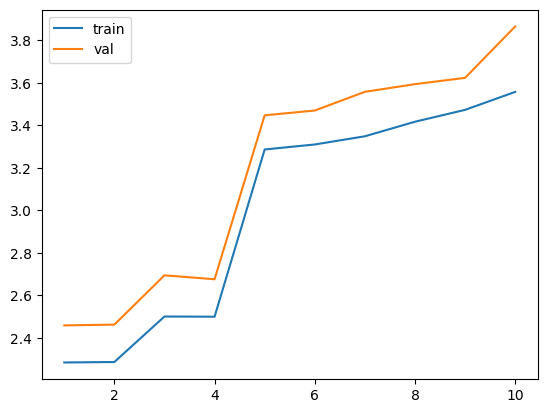

In [12]:
from tssltools import fit_ar, predict_ar_1step

mse_train = []
mse_val = []
detrend = detrend.flatten()

for p in range(1, 11):
    ar = fit_ar(train.flatten(), p)
    mse_train.append(np.mean((train - predict_ar_1step(ar, train.flatten()))**2))
    mse_val.append(np.mean((val - predict_ar_1step(ar, val.flatten()))**2))


plt.plot(range(1,11),mse_train, label = 'train')
plt.plot(range(1,11),mse_val, label = 'val')
plt.legend()
plt.show()


**b)** Verify that the resulting AR models is stable directly based on the model parameters.
<div style="text-align: right"> (2p) </div>

**Solution:**

In [17]:
theta = fit_ar(train.flatten(), 1)
mat = np.ndarray(shape = (1,1), buffer = np.array([theta]))
mat
np.abs(np.linalg.eigvals(mat))



array([0.10029993])

___

**c)** Predict the value of $y_{n+1}$. Where $n$ is the **total number of observations** including both the training and testing data.
<div style="text-align: right"> (2p) </div>

**Solution:**

In [18]:
theta = fit_ar(train.flatten(), 1)
n = len(detrend)
p = len(theta)

last_value = np.flip(detrend[-1:])
pred = np.sum(last_value * theta)
pred

-0.11166692017286597